In [70]:
#libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


# EDA

In [71]:
# Ensure the .kaggle directory and the kaggle.json file exist
kaggle_path = os.path.expanduser('~/.kaggle/kaggle.json')

if not os.path.exists(kaggle_path):
    raise FileNotFoundError(f"The kaggle.json file was not found in {kaggle_path}. Please ensure it is correctly placed.")

# Set the correct permissions for the kaggle.json file
os.chmod(os.path.expanduser('~/.kaggle'), 0o700)
os.chmod(kaggle_path, 0o600)

# Download the dataset using the Kaggle API
os.system('kaggle datasets download -d thedevastator/maternal-mental-health-and-infant-sleep --unzip')

# Load the dataset with the correct encoding
file_path = 'Dataset_maternal_mental_health_infant_sleep.csv'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist in the current directory.")

# Attempt to load the CSV with the 'latin1' encoding
mental_health = pd.read_csv(file_path, encoding='latin1')


Dataset URL: https://www.kaggle.com/datasets/thedevastator/maternal-mental-health-and-infant-sleep
License(s): CC0-1.0


100%|██████████| 288k/288k [00:00<00:00, 1.17MB/s]


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_24971/1745375131.py:20: DtypeWarning: Columns (6,61) have mixed types. Specify dtype option on import or set low_memory=False.
  mental_health = pd.read_csv(file_path, encoding='latin1')


In [72]:
# Check the first few rows of the dataset
mental_health.head()


,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_Autre,Marital_status_edit,Education,Gestationnal_age,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,1.0,1.0,1.0,1.0,34.0,2.0,NaN,2.0,5.0,37.0,...,NaN,7.0,NaN,NaN,7.0,6.0,NaN,10:00,3.0,2.0
1,2.0,1.0,1.0,1.0,33.0,2.0,NaN,2.0,5.0,42.0,...,2.0,3.0,2.0,2.0,2.0,3.0,4.0,11:00,0.0,4.0
2,3.0,1.0,1.0,1.0,37.0,2.0,NaN,2.0,5.0,41.0,...,4.0,4.0,3.0,1.0,4.0,NaN,NaN,12:00,1.0,2.0
3,4.0,1.0,1.0,1.0,31.0,2.0,NaN,2.0,5.0,37.5,...,1.0,3.0,NaN,NaN,NaN,5.0,NaN,11:00,2.0,1.0
4,5.0,1.0,1.0,1.0,36.0,1.0,NaN,1.0,5.0,40.0,...,4.0,2.0,2.0,4.0,5.0,6.0,6.0,10:30,1.0,4.0


In [73]:
#All columns
mental_health.columns

Index(['Participant_number', 'Type_parents', 'Birth_1mth_M_inclusion',
       'Birth_12mth_M_inclusion', 'Age', 'Marital_status',
       'Marital_status_Autre', 'Marital_status_edit', 'Education',
       'Gestationnal_age', 'Type_pregnancy', 'sex_baby1', 'CBTS_M_3',
       'CBTS_M_4', 'CBTS_M_5', 'CBTS_M_6', 'CBTS_M_7', 'CBTS_M_8', 'CBTS_M_9',
       'CBTS_M_10', 'CBTS_M_11', 'CBTS_M_12', 'CBTS_13', 'CBTS_14', 'CBTS_15',
       'CBTS_16', 'CBTS_17', 'CBTS_18', 'CBTS_19', 'CBTS_20', 'CBTS_21',
       'CBTS_22', 'EPDS_1', 'EPDS_2', 'EPDS_3', 'EPDS_4', 'EPDS_5', 'EPDS_6',
       'EPDS_7', 'EPDS_8', 'EPDS_9', 'EPDS_10', 'HADS_1', 'HADS_3', 'HADS_5',
       'HADS_7', 'HADS_9', 'HADS_11', 'HADS_13', 'Child_survey_participation',
       'Age_bb', 'IBQ_R_VSF_3_bb1', 'IBQ_R_VSF_4_bb1', 'IBQ_R_VSF_9_bb1',
       'IBQ_R_VSF_10_bb1', 'IBQ_R_VSF_16_bb1', 'IBQ_R_VSF_17_bb1',
       'IBQ_R_VSF_28_bb1', 'IBQ_R_VSF_29_bb1', 'IBQ_R_VSF_32_bb1',
       'IBQ_R_VSF_33_bb1', 'Sleep_night_duration_bb1',
    

In [74]:
#Check the shape of the data
mental_health.shape


(1048292, 64)

In [75]:
# Check the data types and missing values
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048292 entries, 0 to 1048291
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Participant_number          410 non-null    float64
 1   Type_parents                410 non-null    float64
 2   Birth_1mth_M_inclusion      410 non-null    float64
 3   Birth_12mth_M_inclusion     410 non-null    float64
 4   Age                         410 non-null    float64
 5   Marital_status              410 non-null    float64
 6   Marital_status_Autre        2 non-null      object 
 7   Marital_status_edit         410 non-null    float64
 8   Education                   410 non-null    float64
 9   Gestationnal_age            410 non-null    float64
 10  Type_pregnancy              410 non-null    float64
 11  sex_baby1                   410 non-null    float64
 12  CBTS_M_3                    410 non-null    float64
 13  CBTS_M_4                   

In [76]:
mental_health.describe()

,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_edit,Education,Gestationnal_age,Type_pregnancy,...,IBQ_R_VSF_9_bb1,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
count,410.000000,410.0,410.0,410.0,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,...,376.000000,375.000000,394.000000,329.000000,347.000000,395.000000,378.000000,326.000000,410.000000,410.000000
mean,205.500000,1.0,1.0,1.0,30.197561,2.002439,1.982927,4.080488,39.114146,1.012195,...,3.960106,3.360000,3.195431,2.477204,2.927954,4.326582,4.246032,3.634969,1.439024,3.041463
std,118.501055,0.0,0.0,0.0,4.362262,0.359970,0.225948,1.001642,1.900777,0.109890,...,1.973424,1.969283,1.773391,1.481676,2.121456,1.839272,1.725237,2.176491,1.589218,1.397076
min,1.000000,1.0,1.0,1.0,19.000000,1.000000,1.000000,1.000000,26.500000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,103.250000,1.0,1.0,1.0,27.000000,2.000000,2.000000,3.000000,38.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.000000
50%,205.500000,1.0,1.0,1.0,30.000000,2.000000,2.000000,4.000000,39.200000,1.000000,...,4.000000,3.000000,3.000000,2.000000,2.000000,4.000000,4.000000,3.000000,1.000000,4.000000
75%,307.750000,1.0,1.0,1.0,33.000000,2.000000,2.000000,5.000000,40.400000,1.000000,...,6.000000,5.000000,4.000000,3.000000,5.000000,6.000000,6.000000,6.000000,2.000000,4.000000
max,410.000000,1.0,1.0,1.0,47.000000,6.000000,3.000000,5.000000,43.000000,2.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,10.000000,5.000000


In [77]:
# Check for missing values
print("\nMissing values in each column:")
print(mental_health.isnull().sum())


Missing values in each column:
Participant_number            1047882
Type_parents                  1047882
Birth_1mth_M_inclusion        1047882
Birth_12mth_M_inclusion       1047882
Age                           1047882
                               ...   
IBQ_R_VSF_32_bb1              1047914
IBQ_R_VSF_33_bb1              1047966
Sleep_night_duration_bb1      1047882
night_awakening_number_bb1    1047882
how_falling_asleep_bb1        1047882
Length: 64, dtype: int64


In [78]:
#Delete completely empty rows
mental_health = mental_health.dropna(how='all')

In [79]:
mental_health.shape

(410, 64)

In [80]:
mental_health.isna().sum()

Participant_number             0
Type_parents                   0
Birth_1mth_M_inclusion         0
Birth_12mth_M_inclusion        0
Age                            0
                              ..
IBQ_R_VSF_32_bb1              32
IBQ_R_VSF_33_bb1              84
Sleep_night_duration_bb1       0
night_awakening_number_bb1     0
how_falling_asleep_bb1         0
Length: 64, dtype: int64

In [81]:
# Check columns containing missing values
missing_columns = mental_health.columns[mental_health.isna().any()].tolist()

# Display columns containing missing values
print("Columns with missing values:")
print(missing_columns)


Columns with missing values:
['Marital_status_Autre', 'IBQ_R_VSF_3_bb1', 'IBQ_R_VSF_4_bb1', 'IBQ_R_VSF_9_bb1', 'IBQ_R_VSF_10_bb1', 'IBQ_R_VSF_16_bb1', 'IBQ_R_VSF_17_bb1', 'IBQ_R_VSF_28_bb1', 'IBQ_R_VSF_29_bb1', 'IBQ_R_VSF_32_bb1', 'IBQ_R_VSF_33_bb1']


In [82]:
#Item determining participant's marital status. 1 = single; 2 = in a relationship; 3 = separated, divorced or widow; 6 = other. 
print("Number of occurrences where ' marital status' is equal to 6:")
print((mental_health['Marital_status'] == 6).sum())

Number of occurrences where ' marital status' is equal to 6:
2


In [83]:
#count of NaN values in the 'Marital_status_Autre'. 
# Item linked to the previous one "Marital_status" allowing a text description if the response was other (=6)
mental_health['Marital_status_Autre'].isna().sum()

408

In [84]:
# Boolean indexing to filter rows where the value is not NaN
non_null_entries = mental_health[mental_health['Marital_status_Autre'].notna()]

# Print the entries where the value is not NaN
print("Entries where the value is not NaN:")
non_null_entries

Entries where the value is not NaN:


,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_Autre,Marital_status_edit,Education,Gestationnal_age,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
230,231.0,1.0,1.0,1.0,31.0,6.0,Pacsée,2.0,5.0,38.2,...,4.0,7.0,NaN,7.0,4.0,7.0,7.0,09:00,1.0,1.0
305,306.0,1.0,1.0,1.0,26.0,6.0,Pacse,2.0,5.0,39.0,...,7.0,NaN,4.0,1.0,2.0,6.0,NaN,08:00,2.0,1.0


In [85]:
#Marital_status_edit: Combinaison of two variables: "Marital_status" and "Marital_status_Autre" 
# 1 = single; 2 = in a relationship; 3 = separated, divorced or widow. Responses such as "Pacse" and "Pacsée", at "Marital_status_Autre were recoded as "in a relationship".
# Compare the two columns to find where they are different
columns_different = mental_health['Marital_status'] != mental_health['Marital_status_edit']

# Filter the rows where the values are different
different_rows = mental_health[columns_different]

# Show the rows where the values of 'Marital_status' and 'Marital_status_edit' are different
print("\nRows where the values of 'Marital_status' and 'Marital_status_edit' are equal:")
different_rows



Rows where the values of 'Marital_status' and 'Marital_status_edit' are equal:


,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_Autre,Marital_status_edit,Education,Gestationnal_age,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
230,231.0,1.0,1.0,1.0,31.0,6.0,Pacsée,2.0,5.0,38.2,...,4.0,7.0,NaN,7.0,4.0,7.0,7.0,09:00,1.0,1.0
305,306.0,1.0,1.0,1.0,26.0,6.0,Pacse,2.0,5.0,39.0,...,7.0,NaN,4.0,1.0,2.0,6.0,NaN,08:00,2.0,1.0


In [86]:
# Specify the columns to drop
columns_to_drop = ['Marital_status', 'Marital_status_Autre']

# Drop the specified columns
mental_health = mental_health.drop(columns=columns_to_drop)


In [87]:
# Item determining whether the participant is the person who gave birth or the partner (inclusion criteria), 1 = the person who gave birth; 2 = the partner
print("Number of occurrences where 'Type_parents' is equal to 2:")
print((mental_health['Type_parents'] == 2).sum())


Number of occurrences where 'Type_parents' is equal to 2:
0


In [88]:
# Item determining whether childbirth occured more than one month ago (inclusion criteria), 1 = yes; 2 = no
print("Number of occurrences where 'Birth_1mth_M_inclusion' is equal to 2:")
print((mental_health['Birth_1mth_M_inclusion'] == 2).sum())

Number of occurrences where 'Birth_1mth_M_inclusion' is equal to 2:
0


In [89]:
# Item determining whether childbirth occured more less than 12 months ago (inclusion criteria), 1 = yes; 2 = no
print("Number of occurrences where 'Birth_12mth_M_inclusion' is equal to 2:")
print((mental_health['Birth_12mth_M_inclusion'] == 2).sum())

Number of occurrences where 'Birth_12mth_M_inclusion' is equal to 2:
0


In [90]:
# Item determining whether child survey participation, 1 = yes; 2 = no
print("Number of occurrences where 'Birth_12mth_M_inclusion' is equal to 2:")
print((mental_health['Child_survey_participation'] == 2).sum())

Number of occurrences where 'Birth_12mth_M_inclusion' is equal to 2:
0


In [91]:
# Specify the columns to drop
columns_to_drop = ['Type_parents', 'Birth_1mth_M_inclusion', 'Birth_12mth_M_inclusion', 'Child_survey_participation']

# Drop the specified columns
mental_health = mental_health.drop(columns=columns_to_drop)


The City Birth Trauma Scale (CBTS) is a tool designed to assess traumatic experiences during childbirth. It aims to identify women who may have experienced distressing events or trauma during labor and delivery. Developed by City University, London, the CBTS helps healthcare professionals understand the emotional impact of childbirth on women and provides insights into their psychological well-being postpartum.

The scale typically consists of a series of questions or statements related to the childbirth experience, such as the woman's feelings of safety, control, and support during labor, as well as any distressing events or complications that occurred. Responses are often rated on a scale to quantify the severity of trauma experienced.

The CBTS serves several purposes:

- Screening: It helps healthcare providers identify women who may be at risk of experiencing postpartum psychological difficulties due to traumatic childbirth experiences.

- Assessment: It provides a standardized method for assessing the severity of birth trauma and its impact on maternal mental health.

- Intervention: By identifying women who have experienced birth trauma, healthcare professionals can offer appropriate support, counseling, or therapeutic interventions to address their emotional needs and promote recovery.

- Scoring: 

0 - Not at all
1 - Once
2 - 2-4 times
3 - 5 or more times

Minimum score -0 
Maximium score - 60

- Interpretation: The total score obtained from the CBTS questionnaire is interpreted to assess the woman's level of birth trauma. Higher total scores may indicate a greater degree of trauma or distress experienced during childbirth, while lower scores may suggest a less traumatic experience.


They could be categorized into different subscales of the Cognitive-Behavioral Therapy for postnatal depression (CBT-PND) assessment. Here's a translation of the questions into English along with their categorization into potential CBT-PND subscales:


Intrusive Thoughts and Memories:
CBTS_M_3. Repeated and involuntary memories of childbirth (or parts of childbirth) that you cannot control.
CBTS_M_4. Bad dreams or nightmares of childbirth, or related to childbirth.
CBTS_M_5. Flashbacks of childbirth and/or reliving the experience.
CBTS_M_6. Being troubled when something reminds you of childbirth.
CBTS_M_7. Being tense or anxious when something reminds you of childbirth.

Avoidance:
CBTS_M_8. Trying to avoid thinking about childbirth.
CBTS_M_9. Trying to avoid things that remind you of childbirth (e.g., people, places, TV programs, etc.).
CBTS_M_10. Unable to recall details of childbirth.

Negative Thoughts and Feelings:
CBTS_M_11. Blaming yourself or others for what happened during childbirth.
CBTS_M_12. Having intense negative emotions about childbirth (e.g., fear, anger, shame).
CBTS_M_13. Having negative beliefs about yourself, or fearing that something terrible will happen.
CBTS_M_14. Losing interest in activities that were important to you before.
CBTS_M_15. Feeling detached from others.
CBTS_M_16. Unable to feel positive emotions (e.g., joy, excitement).

Emotional Dysregulation:
CBTS_M_17. Feeling irritable or aggressive.
CBTS_M_18. Feeling self-destructive, or acting recklessly.
CBTS_M_19. Feeling tense and on edge.
CBTS_M_20. Feeling restless or easily startled.

Cognitive Impairment:
CBTS_M_21. Having difficulty concentrating.

Sleep Disturbance:
CBTS_M_22. Sleeping poorly due to things unrelated to the baby's sleep schedule.



In [92]:

# List of columns to sum
columns_to_sum = ['CBTS_M_3',
       'CBTS_M_4', 'CBTS_M_5', 'CBTS_M_6', 'CBTS_M_7', 'CBTS_M_8', 'CBTS_M_9',
       'CBTS_M_10', 'CBTS_M_11', 'CBTS_M_12', 'CBTS_13', 'CBTS_14', 'CBTS_15',
       'CBTS_16', 'CBTS_17', 'CBTS_18', 'CBTS_19', 'CBTS_20', 'CBTS_21', 'CBTS_22' ]

# Sum the values of the specified columns and create a new column 'total_score_CBTS'
mental_health['total_score_CBTS'] = mental_health[columns_to_sum].sum(axis=1)

# List of columns for each subscale
intrusive_thoughts_columns = ['CBTS_M_3', 'CBTS_M_4', 'CBTS_M_5', 'CBTS_M_6', 'CBTS_M_7']
avoidance_columns = ['CBTS_M_8', 'CBTS_M_9', 'CBTS_M_10']
negative_thoughts_columns = ['CBTS_M_11', 'CBTS_M_12', 'CBTS_13', 'CBTS_14', 'CBTS_15', 'CBTS_16']
emotional_dysregulation_columns = ['CBTS_17', 'CBTS_18', 'CBTS_19', 'CBTS_20']
cognitive_impairment_columns = ['CBTS_21']
sleep_disturbance_columns = ['CBTS_22']

# Calculate sum of scores for each subscale
mental_health['subscale_CBTS_intrusive_thoughts_score'] = mental_health[intrusive_thoughts_columns].sum(axis=1)
mental_health['subscale_CBTS_avoidance_score'] = mental_health[avoidance_columns].sum(axis=1)
mental_health['subscale_CBTS_negative_thoughts_score'] = mental_health[negative_thoughts_columns].sum(axis=1)
mental_health['subscale_CBTS_emotional_dysregulation_score'] = mental_health[emotional_dysregulation_columns].sum(axis=1)
mental_health['subscale_CBTS_cognitive_impairment_score'] = mental_health[cognitive_impairment_columns].sum(axis=1)
mental_health['subscale_CBTS_sleep_disturbance_score'] = mental_health[sleep_disturbance_columns].sum(axis=1)

# Print the DataFrame with the new column
mental_health


,Participant_number,Age,Marital_status_edit,Education,Gestationnal_age,Type_pregnancy,sex_baby1,CBTS_M_3,CBTS_M_4,CBTS_M_5,...,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1,total_score_CBTS,subscale_CBTS_intrusive_thoughts_score,subscale_CBTS_avoidance_score,subscale_CBTS_negative_thoughts_score,subscale_CBTS_emotional_dysregulation_score,subscale_CBTS_cognitive_impairment_score,subscale_CBTS_sleep_disturbance_score
0,1.0,34.0,2.0,5.0,37.0,1.0,1.0,0.0,0.0,0.0,...,10:00,3.0,2.0,6.0,0.0,1.0,0.0,4.0,0.0,1.0
1,2.0,33.0,2.0,5.0,42.0,1.0,2.0,0.0,0.0,0.0,...,11:00,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,37.0,2.0,5.0,41.0,1.0,1.0,0.0,0.0,1.0,...,12:00,1.0,2.0,9.0,1.0,0.0,2.0,4.0,2.0,0.0
3,4.0,31.0,2.0,5.0,37.5,1.0,2.0,0.0,0.0,1.0,...,11:00,2.0,1.0,14.0,3.0,1.0,5.0,3.0,2.0,0.0
4,5.0,36.0,1.0,5.0,40.0,1.0,2.0,0.0,0.0,0.0,...,10:30,1.0,4.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406.0,31.0,2.0,3.0,39.5,1.0,2.0,0.0,0.0,0.0,...,09:00,1.0,2.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0
406,407.0,26.0,2.0,2.0,37.0,1.0,2.0,0.0,0.0,3.0,...,12:00,0.0,4.0,8.0,3.0,0.0,0.0,1.0,1.0,3.0
407,408.0,26.0,2.0,5.0,39.0,1.0,1.0,0.0,0.0,0.0,...,10:00,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408,409.0,27.0,2.0,5.0,41.2,1.0,1.0,0.0,0.0,0.0,...,11:30,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
# Drop columns after score interpretation
columns_to_drop = ['CBTS_M_3',
       'CBTS_M_4', 'CBTS_M_5', 'CBTS_M_6', 'CBTS_M_7', 'CBTS_M_8', 'CBTS_M_9',
       'CBTS_M_10', 'CBTS_M_11', 'CBTS_M_12', 'CBTS_13', 'CBTS_14', 'CBTS_15',
       'CBTS_16', 'CBTS_17', 'CBTS_18', 'CBTS_19', 'CBTS_20', 'CBTS_21', 'CBTS_22' ]
# Drop the specified columns
mental_health = mental_health.drop(columns=columns_to_drop)

In [94]:
mental_health

,Participant_number,Age,Marital_status_edit,Education,Gestationnal_age,Type_pregnancy,sex_baby1,EPDS_1,EPDS_2,EPDS_3,...,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1,total_score_CBTS,subscale_CBTS_intrusive_thoughts_score,subscale_CBTS_avoidance_score,subscale_CBTS_negative_thoughts_score,subscale_CBTS_emotional_dysregulation_score,subscale_CBTS_cognitive_impairment_score,subscale_CBTS_sleep_disturbance_score
0,1.0,34.0,2.0,5.0,37.0,1.0,1.0,1.0,2.0,2.0,...,10:00,3.0,2.0,6.0,0.0,1.0,0.0,4.0,0.0,1.0
1,2.0,33.0,2.0,5.0,42.0,1.0,2.0,0.0,0.0,0.0,...,11:00,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,37.0,2.0,5.0,41.0,1.0,1.0,1.0,0.0,2.0,...,12:00,1.0,2.0,9.0,1.0,0.0,2.0,4.0,2.0,0.0
3,4.0,31.0,2.0,5.0,37.5,1.0,2.0,1.0,1.0,2.0,...,11:00,2.0,1.0,14.0,3.0,1.0,5.0,3.0,2.0,0.0
4,5.0,36.0,1.0,5.0,40.0,1.0,2.0,0.0,0.0,1.0,...,10:30,1.0,4.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406.0,31.0,2.0,3.0,39.5,1.0,2.0,0.0,0.0,1.0,...,09:00,1.0,2.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0
406,407.0,26.0,2.0,2.0,37.0,1.0,2.0,0.0,0.0,1.0,...,12:00,0.0,4.0,8.0,3.0,0.0,0.0,1.0,1.0,3.0
407,408.0,26.0,2.0,5.0,39.0,1.0,1.0,0.0,0.0,0.0,...,10:00,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408,409.0,27.0,2.0,5.0,41.2,1.0,1.0,0.0,0.0,0.0,...,11:30,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Edinburgh Postnatal Depression Scale (EPDS)  is a screening tool designed to identify mothers experiencing postpartum depression. It is widely used in clinical practice and research to assess the emotional well-being of mothers after childbirth. 
- Purpose: The EPDS is specifically designed to detect symptoms of postnatal depression, which can occur in the weeks and months following childbirth.

- Structure: The scale consists of 10 self-report questions. Each question is scored on a scale from 0 to 3, based on the severity of the symptom described.

- Scoring: The total score is calculated by summing the scores of the 10 items. The maximum possible score is 30. Higher scores indicate a greater likelihood of depression. Commonly, a cutoff scoring above 12 or 13 are likely to be suffering from depression and should seek medical attentionis used to identify women who may need further evaluation.


In [95]:

# List of columns to sum
columns_to_sum = ['EPDS_1', 'EPDS_2', 'EPDS_3', 'EPDS_4', 'EPDS_5', 'EPDS_6',
       'EPDS_7', 'EPDS_8', 'EPDS_9', 'EPDS_10']

# Sum the values of the specified columns and create a new column 'total_score_EPDS'
mental_health['total_score_EPDS'] = mental_health[columns_to_sum].sum(axis=1)

# Define the function to categorize EPDS scores
def categorize_epds(score):
    if score <= 12:
        return 'Normal'
    else:
        return 'Depression'

# Apply the categorization function to create a new column
mental_health['EPDS_category'] = mental_health['total_score_EPDS'].apply(categorize_epds)

# Print the DataFrame with the new column
mental_health

,Participant_number,Age,Marital_status_edit,Education,Gestationnal_age,Type_pregnancy,sex_baby1,EPDS_1,EPDS_2,EPDS_3,...,how_falling_asleep_bb1,total_score_CBTS,subscale_CBTS_intrusive_thoughts_score,subscale_CBTS_avoidance_score,subscale_CBTS_negative_thoughts_score,subscale_CBTS_emotional_dysregulation_score,subscale_CBTS_cognitive_impairment_score,subscale_CBTS_sleep_disturbance_score,total_score_EPDS,EPDS_category
0,1.0,34.0,2.0,5.0,37.0,1.0,1.0,1.0,2.0,2.0,...,2.0,6.0,0.0,1.0,0.0,4.0,0.0,1.0,13.0,Depression
1,2.0,33.0,2.0,5.0,42.0,1.0,2.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,3.0,37.0,2.0,5.0,41.0,1.0,1.0,1.0,0.0,2.0,...,2.0,9.0,1.0,0.0,2.0,4.0,2.0,0.0,8.0,Normal
3,4.0,31.0,2.0,5.0,37.5,1.0,2.0,1.0,1.0,2.0,...,1.0,14.0,3.0,1.0,5.0,3.0,2.0,0.0,16.0,Depression
4,5.0,36.0,1.0,5.0,40.0,1.0,2.0,0.0,0.0,1.0,...,4.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406.0,31.0,2.0,3.0,39.5,1.0,2.0,0.0,0.0,1.0,...,2.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,4.0,Normal
406,407.0,26.0,2.0,2.0,37.0,1.0,2.0,0.0,0.0,1.0,...,4.0,8.0,3.0,0.0,0.0,1.0,1.0,3.0,9.0,Normal
407,408.0,26.0,2.0,5.0,39.0,1.0,1.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,Normal
408,409.0,27.0,2.0,5.0,41.2,1.0,1.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [96]:
# Drop columns after score interpretation
columns_to_drop = ['EPDS_1', 'EPDS_2', 'EPDS_3', 'EPDS_4', 'EPDS_5', 'EPDS_6',
       'EPDS_7', 'EPDS_8', 'EPDS_9', 'EPDS_10']
# Drop the specified columns
mental_health = mental_health.drop(columns=columns_to_drop)

In [97]:
mental_health

,Participant_number,Age,Marital_status_edit,Education,Gestationnal_age,Type_pregnancy,sex_baby1,HADS_1,HADS_3,HADS_5,...,how_falling_asleep_bb1,total_score_CBTS,subscale_CBTS_intrusive_thoughts_score,subscale_CBTS_avoidance_score,subscale_CBTS_negative_thoughts_score,subscale_CBTS_emotional_dysregulation_score,subscale_CBTS_cognitive_impairment_score,subscale_CBTS_sleep_disturbance_score,total_score_EPDS,EPDS_category
0,1.0,34.0,2.0,5.0,37.0,1.0,1.0,2.0,1.0,2.0,...,2.0,6.0,0.0,1.0,0.0,4.0,0.0,1.0,13.0,Depression
1,2.0,33.0,2.0,5.0,42.0,1.0,2.0,1.0,0.0,1.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,3.0,37.0,2.0,5.0,41.0,1.0,1.0,2.0,1.0,1.0,...,2.0,9.0,1.0,0.0,2.0,4.0,2.0,0.0,8.0,Normal
3,4.0,31.0,2.0,5.0,37.5,1.0,2.0,1.0,3.0,3.0,...,1.0,14.0,3.0,1.0,5.0,3.0,2.0,0.0,16.0,Depression
4,5.0,36.0,1.0,5.0,40.0,1.0,2.0,1.0,0.0,0.0,...,4.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406.0,31.0,2.0,3.0,39.5,1.0,2.0,1.0,0.0,0.0,...,2.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,4.0,Normal
406,407.0,26.0,2.0,2.0,37.0,1.0,2.0,2.0,3.0,3.0,...,4.0,8.0,3.0,0.0,0.0,1.0,1.0,3.0,9.0,Normal
407,408.0,26.0,2.0,5.0,39.0,1.0,1.0,0.0,0.0,1.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,Normal
408,409.0,27.0,2.0,5.0,41.2,1.0,1.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


# HADS

The Hospital Anxiety and Depression Scale (HADS) is a widely used self-assessment scale designed to identify anxiety and depression among patients in a hospital setting, although it is also used in primary care and community settings. The scale consists of two subscales: one for anxiety (HADS-A) and one for depression (HADS-D). Here is a more detailed explanation of the anxiety subscale (HADS-A):

- Purpose: The HADS-A is specifically designed to detect symptoms of anxiety in patients. It helps clinicians assess the severity of anxiety symptoms and identify patients who may need further evaluation or treatment for anxiety disorders.

- Structure: The HADS-A subscale consists of 7 items. Each item is scored on a 4-point scale ranging from 0 to 3, with different scoring based on the presence and severity of symptoms.

- Scoring: The total score for the HADS-A is obtained by summing the scores of the 7 items, with a possible range from 0 to 21. Higher scores indicate more severe anxiety symptoms. The scoring interpretation is generally as follows:

0-7: Normal
8-10: Borderline abnormal (suggestive of the presence of anxiety)
11-21: Abnormal (indicative of clinically significant anxiety)

In [98]:

# List of columns to sum
columns_to_sum = ['HADS_1', 'HADS_3', 'HADS_5','HADS_7', 'HADS_9', 'HADS_11', 'HADS_13' ]

# Sum the values of the specified columns and create a new column 'total_score_HADS'
mental_health['total_score_HADS'] = mental_health[columns_to_sum].sum(axis=1)

# Define the categories and corresponding labels
def categorize_hads(score):
    if score <= 7:
        return 'Normal'
    elif score <= 10:
        return 'Borderline abnormal'
    else:
        return 'Abnormal'

# Apply the categorization function to create a new column
mental_health['HADS_category'] = mental_health['total_score_HADS'].apply(categorize_hads)

# Print the DataFrame with the new column
mental_health

,Participant_number,Age,Marital_status_edit,Education,Gestationnal_age,Type_pregnancy,sex_baby1,HADS_1,HADS_3,HADS_5,...,subscale_CBTS_intrusive_thoughts_score,subscale_CBTS_avoidance_score,subscale_CBTS_negative_thoughts_score,subscale_CBTS_emotional_dysregulation_score,subscale_CBTS_cognitive_impairment_score,subscale_CBTS_sleep_disturbance_score,total_score_EPDS,EPDS_category,total_score_HADS,HADS_category
0,1.0,34.0,2.0,5.0,37.0,1.0,1.0,2.0,1.0,2.0,...,0.0,1.0,0.0,4.0,0.0,1.0,13.0,Depression,9.0,Borderline abnormal
1,2.0,33.0,2.0,5.0,42.0,1.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,3.0,Normal
2,3.0,37.0,2.0,5.0,41.0,1.0,1.0,2.0,1.0,1.0,...,1.0,0.0,2.0,4.0,2.0,0.0,8.0,Normal,9.0,Borderline abnormal
3,4.0,31.0,2.0,5.0,37.5,1.0,2.0,1.0,3.0,3.0,...,3.0,1.0,5.0,3.0,2.0,0.0,16.0,Depression,13.0,Abnormal
4,5.0,36.0,1.0,5.0,40.0,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1.0,3.0,Normal,3.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406.0,31.0,2.0,3.0,39.5,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,4.0,Normal,4.0,Normal
406,407.0,26.0,2.0,2.0,37.0,1.0,2.0,2.0,3.0,3.0,...,3.0,0.0,0.0,1.0,1.0,3.0,9.0,Normal,14.0,Abnormal
407,408.0,26.0,2.0,5.0,39.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,Normal,3.0,Normal
408,409.0,27.0,2.0,5.0,41.2,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,4.0,Normal


In [99]:
# Drop columns after score interpretation
columns_to_drop = ['HADS_1', 'HADS_3', 'HADS_5','HADS_7', 'HADS_9', 'HADS_11', 'HADS_13' ]
# Drop the specified columns
mental_health = mental_health.drop(columns=columns_to_drop)

In [100]:
mental_health

,Participant_number,Age,Marital_status_edit,Education,Gestationnal_age,Type_pregnancy,sex_baby1,Age_bb,IBQ_R_VSF_3_bb1,IBQ_R_VSF_4_bb1,...,subscale_CBTS_intrusive_thoughts_score,subscale_CBTS_avoidance_score,subscale_CBTS_negative_thoughts_score,subscale_CBTS_emotional_dysregulation_score,subscale_CBTS_cognitive_impairment_score,subscale_CBTS_sleep_disturbance_score,total_score_EPDS,EPDS_category,total_score_HADS,HADS_category
0,1.0,34.0,2.0,5.0,37.0,1.0,1.0,1.0,6.0,NaN,...,0.0,1.0,0.0,4.0,0.0,1.0,13.0,Depression,9.0,Borderline abnormal
1,2.0,33.0,2.0,5.0,42.0,1.0,2.0,3.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,3.0,Normal
2,3.0,37.0,2.0,5.0,41.0,1.0,1.0,1.0,1.0,NaN,...,1.0,0.0,2.0,4.0,2.0,0.0,8.0,Normal,9.0,Borderline abnormal
3,4.0,31.0,2.0,5.0,37.5,1.0,2.0,3.0,2.0,5.0,...,3.0,1.0,5.0,3.0,2.0,0.0,16.0,Depression,13.0,Abnormal
4,5.0,36.0,1.0,5.0,40.0,1.0,2.0,3.0,2.0,6.0,...,0.0,0.0,0.0,2.0,0.0,1.0,3.0,Normal,3.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406.0,31.0,2.0,3.0,39.5,1.0,2.0,2.0,1.0,3.0,...,0.0,0.0,1.0,2.0,0.0,0.0,4.0,Normal,4.0,Normal
406,407.0,26.0,2.0,2.0,37.0,1.0,2.0,2.0,7.0,2.0,...,3.0,0.0,0.0,1.0,1.0,3.0,9.0,Normal,14.0,Abnormal
407,408.0,26.0,2.0,5.0,39.0,1.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,Normal,3.0,Normal
408,409.0,27.0,2.0,5.0,41.2,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,4.0,Normal


# IBQ_R_VSF

The Infant Behavior Questionnaire-Revised (IBQ-R) Short Form is a commonly used tool to assess the temperament of infants aged 3 to 12 months. It consists of a series of questions that parents or caregivers answer based on their observations of the infant's behavior.

- The Negative Emotionality dimension in the IBQ-R Short Form captures aspects of an infant's temperament related to negative affect. This dimension typically includes subscales like Fear, Distress to Limitations, Sadness, and possibly others depending on the specific version of the questionnaire.

- Scoring: 1 = Never, 2 = Very Rarely, 3 = Less than Half the Time, 4 = About Half the Time, 5= More thna Half the Time, 6 = Almost Always, 7= Always, Nan = 

The “Does Not Apply” column is used when you did not see the baby in the situation described during the last week. For
example, if the situation mentions the baby having to wait for food or liquids and there was no time during the last week when
the baby had to wait, check the “Does Not Apply” box. “Does Not Apply” is different from “Never”. “Never” is used when you saw
the baby in the situation, but the baby never engaged in the behavior listed during the last week.

I will assume that in this dataset 'does not apply' was coded as NaN.

In [101]:
# List of columns to sum
columns_to_sum = ['IBQ_R_VSF_3_bb1', 'IBQ_R_VSF_4_bb1', 'IBQ_R_VSF_9_bb1',
       'IBQ_R_VSF_10_bb1', 'IBQ_R_VSF_16_bb1', 'IBQ_R_VSF_17_bb1',
       'IBQ_R_VSF_28_bb1', 'IBQ_R_VSF_29_bb1', 'IBQ_R_VSF_32_bb1',
       'IBQ_R_VSF_33_bb1']

# Sum the values of the specified columns and create a new column 'total_score_IBQ_R_VSF'
mental_health['total_score_IBQ_R_VSF'] = mental_health[columns_to_sum].sum(axis=1)

# Print the DataFrame with the new column
mental_health

,Participant_number,Age,Marital_status_edit,Education,Gestationnal_age,Type_pregnancy,sex_baby1,Age_bb,IBQ_R_VSF_3_bb1,IBQ_R_VSF_4_bb1,...,subscale_CBTS_avoidance_score,subscale_CBTS_negative_thoughts_score,subscale_CBTS_emotional_dysregulation_score,subscale_CBTS_cognitive_impairment_score,subscale_CBTS_sleep_disturbance_score,total_score_EPDS,EPDS_category,total_score_HADS,HADS_category,total_score_IBQ_R_VSF
0,1.0,34.0,2.0,5.0,37.0,1.0,1.0,1.0,6.0,NaN,...,1.0,0.0,4.0,0.0,1.0,13.0,Depression,9.0,Borderline abnormal,33.0
1,2.0,33.0,2.0,5.0,42.0,1.0,2.0,3.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Normal,3.0,Normal,25.0
2,3.0,37.0,2.0,5.0,41.0,1.0,1.0,1.0,1.0,NaN,...,0.0,2.0,4.0,2.0,0.0,8.0,Normal,9.0,Borderline abnormal,17.0
3,4.0,31.0,2.0,5.0,37.5,1.0,2.0,3.0,2.0,5.0,...,1.0,5.0,3.0,2.0,0.0,16.0,Depression,13.0,Abnormal,18.0
4,5.0,36.0,1.0,5.0,40.0,1.0,2.0,3.0,2.0,6.0,...,0.0,0.0,2.0,0.0,1.0,3.0,Normal,3.0,Normal,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406.0,31.0,2.0,3.0,39.5,1.0,2.0,2.0,1.0,3.0,...,0.0,1.0,2.0,0.0,0.0,4.0,Normal,4.0,Normal,28.0
406,407.0,26.0,2.0,2.0,37.0,1.0,2.0,2.0,7.0,2.0,...,0.0,0.0,1.0,1.0,3.0,9.0,Normal,14.0,Abnormal,24.0
407,408.0,26.0,2.0,5.0,39.0,1.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,Normal,3.0,Normal,19.0
408,409.0,27.0,2.0,5.0,41.2,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Normal,4.0,Normal,14.0


In [102]:
# Drop columns after score interpretation
columns_to_drop = ['IBQ_R_VSF_3_bb1', 'IBQ_R_VSF_4_bb1', 'IBQ_R_VSF_9_bb1',
       'IBQ_R_VSF_10_bb1', 'IBQ_R_VSF_16_bb1', 'IBQ_R_VSF_17_bb1',
       'IBQ_R_VSF_28_bb1', 'IBQ_R_VSF_29_bb1', 'IBQ_R_VSF_32_bb1',
       'IBQ_R_VSF_33_bb1']
# Drop the specified columns
mental_health = mental_health.drop(columns=columns_to_drop)

In [103]:
# Responses coded as hh:mm. There is one missing data, coded as 99:99
# Filter rows where 'Sleep_night_duration_bb1' is '99:99'
filtered_rows = mental_health[mental_health['Sleep_night_duration_bb1'] == '99:99']

# Drop the specified rows
mental_health = mental_health.drop(index=filtered_rows.index)



In [104]:
# Convert Sleep_night_duration_bb1 from 'hh:mm' format to Timedelta
mental_health['Sleep_night_duration_td'] = pd.to_timedelta(mental_health['Sleep_night_duration_bb1'] + ':00')

# Convert Timedelta to total hours
mental_health['Sleep_night_duration_hours'] = mental_health['Sleep_night_duration_td'].dt.total_seconds() / 3600

In [105]:
# Drop columns after score interpretation
columns_to_drop = ['Sleep_night_duration_td', 'Sleep_night_duration_bb1']
# Drop the specified columns
mental_health = mental_health.drop(columns=columns_to_drop)

In [106]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409 entries, 0 to 409
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Participant_number                           409 non-null    float64
 1   Age                                          409 non-null    float64
 2   Marital_status_edit                          409 non-null    float64
 3   Education                                    409 non-null    float64
 4   Gestationnal_age                             409 non-null    float64
 5   Type_pregnancy                               409 non-null    float64
 6   sex_baby1                                    409 non-null    float64
 7   Age_bb                                       409 non-null    float64
 8   night_awakening_number_bb1                   409 non-null    float64
 9   how_falling_asleep_bb1                       409 non-null    float64
 10  total_s

In [107]:
#Save to CSV
mental_health.to_csv ('mental_health')

# Statistical Analysis

# Demographic features and sleep duration

In [108]:
# Descriptive statistics for age
mean_age = mental_health['Age'].mean()
median_age = mental_health['Age'].median()
std_age = mental_health['Age'].std()
var_age = mental_health['Age'].var()

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Standard Deviation of Age: {std_age}")
print(f"Variance of Age: {var_age}")

Mean Age: 30.200488997555013
Median Age: 30.0
Standard Deviation of Age: 4.367201705976889
Variance of Age: 19.072450740687447


In [109]:
# Additional Analysis: Correlation with Demographic Variables
demographic_vars = ['Age', 'Education', 'Marital_status_edit']
for var in demographic_vars:
    if mental_health[var].dtype == 'O':
        # If the variable is categorical, convert to numerical codes
        mental_health[var] = mental_health[var].astype('category').cat.codes
    corr, p_value = stats.pearsonr(mental_health[var], mental_health['Sleep_night_duration_hours'])
    print(f"Correlation between {var} and Sleep Duration: {corr}, p-value: {p_value}")

Correlation between Age and Sleep Duration: 0.03609735710618726, p-value: 0.4665971216754472
Correlation between Education and Sleep Duration: -0.023147760651636005, p-value: 0.6406685271571098
Correlation between Marital_status_edit and Sleep Duration: -0.00916480676643644, p-value: 0.8533989553240408


Correlation Analysis Interpretation

- Age and Sleep Duration

Correlation Coefficient: 0.0361
P-Value: 0.4666
Interpretation: The correlation coefficient is very close to zero, indicating a very weak positive relationship between age and sleep duration. The p-value is much greater than 0.05, suggesting that this weak relationship is not statistically significant.

- Education and Sleep Duration

Correlation Coefficient: -0.0231
P-Value: 0.6407
Interpretation: The correlation coefficient is close to zero, indicating a very weak negative relationship between education and sleep duration. The high p-value indicates that this relationship is not statistically significant.

- Marital Status and Sleep Duration
Correlation Coefficient: -0.0092
P-Value: 0.8534
Interpretation: The correlation coefficient is very close to zero, indicating a very weak negative relationship between marital status and sleep duration. The p-value is also much greater than 0.05, suggesting no significant relationship.

Mean Sleep Duration: 10.18398533007335
Median Sleep Duration: 10.0
Standard Deviation of Sleep Duration: 1.4329094253835077
Variance of Sleep Duration: 2.0532294213528943
ANOVA Result: F=12.82618945127567, p=7.724550283179724e-10
                             mean  median       std  count
how_falling_asleep_bb1                                    
1.0                      9.550000    10.0  1.662626     90
2.0                      9.858108    10.0  1.495473     74
3.0                     10.068182    10.0  0.903636     22
4.0                     10.708807    11.0  1.174464    176
5.0                     10.000000    10.0  1.281134     47
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0   0.3081 0.5973 -0.2751  0.8914  False
   1.0    3.0   0.5182 0.4942 -0.3658  1.4022  False
   1.0    4.0   1.1588    0.0  0.6772  1.6405   True
   1.0    5.0     0.45 0.3501 -0.2189  

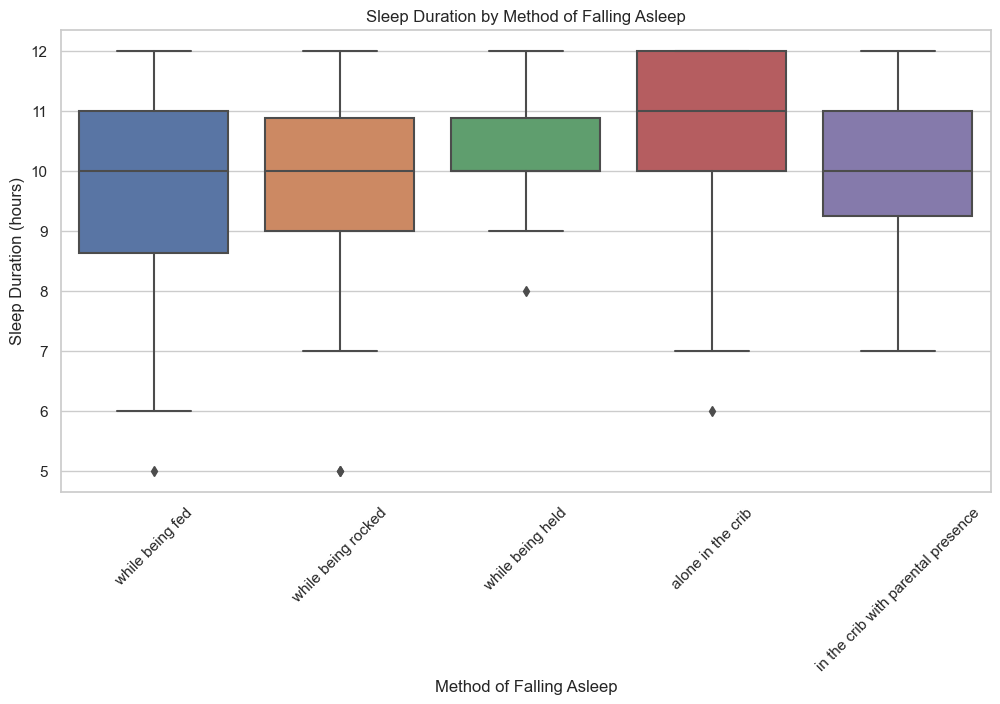

In [110]:
# Descriptive statistics for sleep duration
mean_sleep = mental_health['Sleep_night_duration_hours'].mean()
median_sleep = mental_health['Sleep_night_duration_hours'].median()
std_sleep = mental_health['Sleep_night_duration_hours'].std()
var_sleep = mental_health['Sleep_night_duration_hours'].var()

print(f"Mean Sleep Duration: {mean_sleep}")
print(f"Median Sleep Duration: {median_sleep}")
print(f"Standard Deviation of Sleep Duration: {std_sleep}")
print(f"Variance of Sleep Duration: {var_sleep}")

# Comparative analysis: ANOVA for sleep duration by how_falling_asleep_bb1
anova_result = stats.f_oneway(*[group['Sleep_night_duration_hours'].values for name, group in mental_health.groupby('how_falling_asleep_bb1')])
print(f"ANOVA Result: F={anova_result.statistic}, p={anova_result.pvalue}")

# Further investigation: Summary statistics by group
grouped = mental_health.groupby('how_falling_asleep_bb1')['Sleep_night_duration_hours'].agg(['mean', 'median', 'std', 'count'])
print(grouped)

# Post-hoc Analysis (Tukey's HSD)
posthoc = pairwise_tukeyhsd(mental_health['Sleep_night_duration_hours'], mental_health['how_falling_asleep_bb1'], alpha=0.05)
print(posthoc)

# Visualization: Box plot for sleep duration by method of falling asleep
plt.figure(figsize=(12, 6))
box_plot=sns.boxplot(x='how_falling_asleep_bb1', y='Sleep_night_duration_hours', data=mental_health)
plt.title('Sleep Duration by Method of Falling Asleep')
plt.xlabel('Method of Falling Asleep')
plt.ylabel('Sleep Duration (hours)')
new_labels = ['while being fed','while being rocked','while being held','alone in the crib','in the crib with parental presence']
box_plot.set_xticklabels(new_labels, rotation=45)

# Show plot
plt.show()






ANOVA analysis explores the relationship between different levels of falling asleep and the measured variables (mean, median, std, count).

ANOVA Result: F=12.83, p=7.72e-10

The F-statistic of 12.83 indicates that there is a significant difference among the means of the groups.
The p-value of 7.72e-10 is very low, indicating strong evidence against the null hypothesis. Therefore, we reject the null hypothesis, suggesting that there are significant differences among the groups.

Tukey HSD Test:

This test is used to identify which groups(Method of Falling assleep) are significantly different from each other.
The 'reject' column indicates whether the null hypothesis (no difference between the groups) is rejected for each pairwise comparison.

Pairwise comparisons:

The analysis suggests that there are significant differences in falling asleep between certain groups, particularly between Group 1 and Group 4, and between Group 4 and Group 5.

Correlation with Sleep Duration:
total_score_CBTS                              -0.100660
subscale_CBTS_intrusive_thoughts_score         0.002041
subscale_CBTS_avoidance_score                  0.020800
subscale_CBTS_negative_thoughts_score         -0.091085
subscale_CBTS_emotional_dysregulation_score   -0.172409
subscale_CBTS_cognitive_impairment_score      -0.178273
subscale_CBTS_sleep_disturbance_score         -0.040257
total_score_EPDS                              -0.197585
total_score_HADS                              -0.127916
total_score_IBQ_R_VSF                         -0.071149
Sleep_night_duration_hours                     1.000000
Name: Sleep_night_duration_hours, dtype: float64

Correlation p-values with Sleep Duration:
total_score_CBTS                               0.041884
subscale_CBTS_intrusive_thoughts_score         0.967183
subscale_CBTS_avoidance_score                  0.674920
subscale_CBTS_negative_thoughts_score          0.065727
subscale_CBTS_emotional_dysregulati

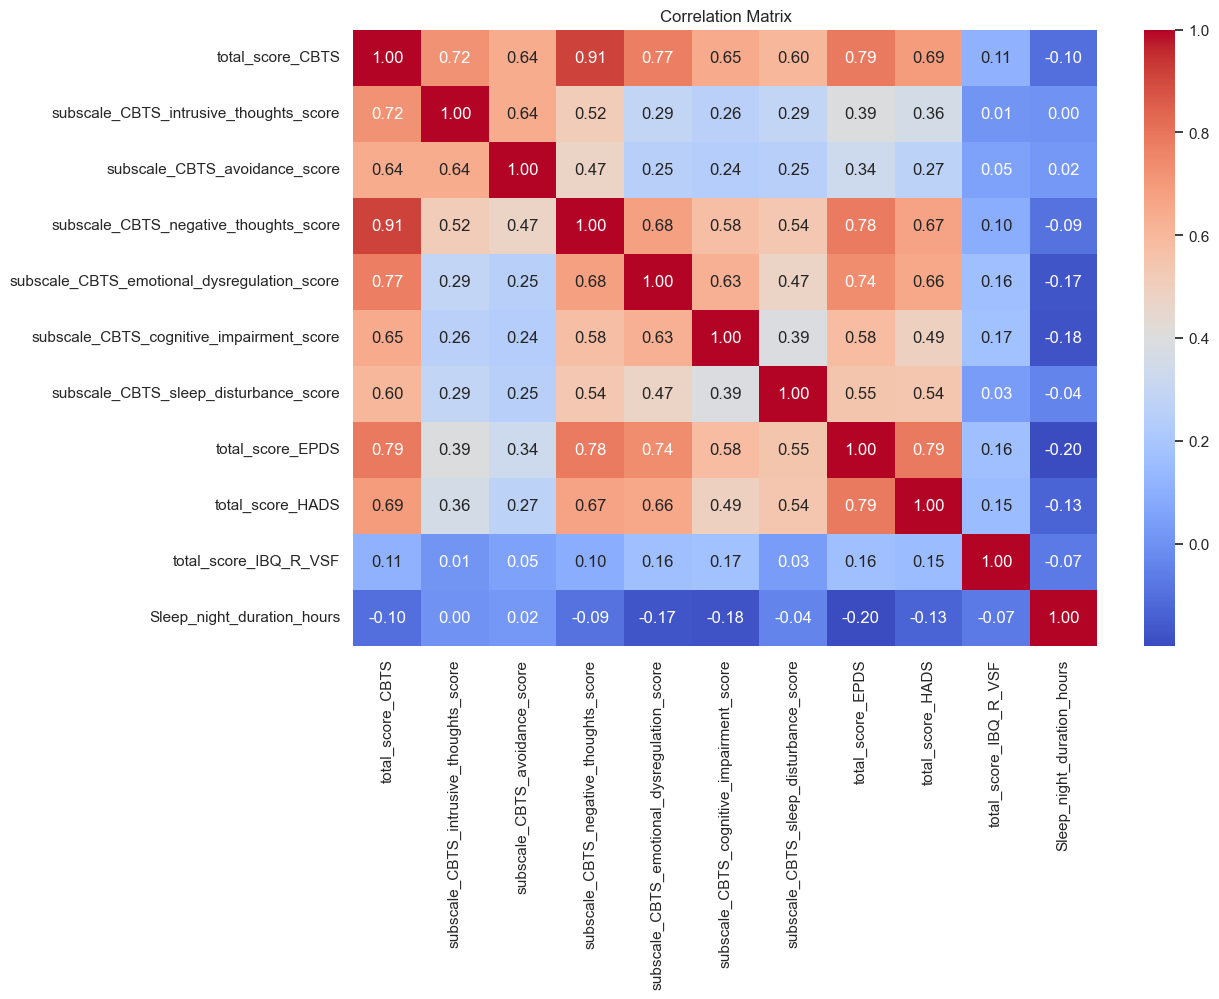

In [111]:
# Descriptive statistics
descriptive_stats = mental_health.describe()

# Correlation analysis
correlation_features = ['total_score_CBTS', 'subscale_CBTS_intrusive_thoughts_score', 
                        'subscale_CBTS_avoidance_score', 'subscale_CBTS_negative_thoughts_score', 'subscale_CBTS_emotional_dysregulation_score', 
                        'subscale_CBTS_cognitive_impairment_score', 'subscale_CBTS_sleep_disturbance_score', 'total_score_EPDS', 
                        'total_score_HADS', 'total_score_IBQ_R_VSF']

correlation_results = mental_health[correlation_features + ['Sleep_night_duration_hours']].corr()['Sleep_night_duration_hours']

# Print correlation results
print("Correlation with Sleep Duration:")
print(correlation_results)

# p-values for the correlations
correlation_pvalues = mental_health[correlation_features + ['Sleep_night_duration_hours']].corr(method=lambda x, y: stats.pearsonr(x, y)[1])['Sleep_night_duration_hours']

# Print correlation p-values
print("\nCorrelation p-values with Sleep Duration:")
print(correlation_pvalues)

# Comparative analysis: ANOVA for sleep duration by categorical variables
categorical_features = ['total_score_EPDS', 'total_score_HADS', 'total_score_CBTS', 'total_score_IBQ_R_VSF']

anova_results = {}
for feature in categorical_features:
    anova_result = stats.f_oneway(*[group['Sleep_night_duration_hours'].values for name, group in mental_health.groupby(feature)])
    anova_results[feature] = {'F-statistic': anova_result.statistic, 'p-value': anova_result.pvalue}
    
# Print ANOVA results
print("\nANOVA Results:")
for feature, result in anova_results.items():
    print(f"{feature} - F: {result['F-statistic']}, p: {result['p-value']}")


# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(mental_health[correlation_features + ['Sleep_night_duration_hours']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



Correlation Analysis:

Interpretation
Negative Affect and Sleep:

There are significant negative correlations between sleep duration and certain subscales of the CBTS (emotional dysregulation and cognitive impairment) as well as the total scores for EPDS and HADS. This suggests that higher levels of negative emotional states or psychological distress are associated with shorter sleep duration.
Non-Significant Findings:

Some CBTS subscales, like intrusive thoughts,avoidance and sleep disturbance score, do not show a significant relationship with sleep duration. This could indicate that these specific aspects of psychological distress do not have a strong impact on sleep duration in the dataset.

Borderline Significance:

The total score for CBTS shows a borderline significant negative correlation with sleep duration, suggesting a potential but not definitive link.

ANOVA F-Test Results
The F-test results help understand the variance explained by each score in relation to sleep duration:

Significant F-Tests:
total_score_EPDS: F = 2.611, p < 0.0001
total_score_HADS: F = 2.144, p = 0.0031
total_score_IBQ_R_VSF: F = 1.488, p = 0.0194 (moderately significant)

Non-Significant F-Test:
total_score_CBTS: F = 0.996, p = 0.4827

These results reinforce the earlier findings that EPDS and HADS scores have a significant relationship with sleep duration, whereas the overall CBTS score does not explain much variance in sleep duration.

Conclusion
Overall, the analysis indicates that specific aspects of psychological distress and negative affectivity (particularly as measured by EPDS, HADS, and certain CBTS subscales) are significantly associated with shorter sleep duration. Addressing emotional dysregulation and cognitive impairment might be particularly important for improving sleep duration. The lack of significant correlation in some subscales and scores suggests that not all aspects of psychological distress equally affect sleep.

# Correlation between demographics e maternal mental health features

Correlation with sex_baby1:
total_score_CBTS                               0.104465
subscale_CBTS_intrusive_thoughts_score         0.072840
subscale_CBTS_avoidance_score                  0.034184
subscale_CBTS_negative_thoughts_score          0.097426
subscale_CBTS_emotional_dysregulation_score    0.094643
subscale_CBTS_cognitive_impairment_score       0.102330
subscale_CBTS_sleep_disturbance_score          0.040169
total_score_EPDS                               0.056826
total_score_HADS                               0.035740
sex_baby1                                      1.000000
Name: sex_baby1, dtype: float64

Correlation p-values with sex_baby1:
total_score_CBTS                               0.034688
subscale_CBTS_intrusive_thoughts_score         0.141415
subscale_CBTS_avoidance_score                  0.490557
subscale_CBTS_negative_thoughts_score          0.048956
subscale_CBTS_emotional_dysregulation_score    0.055815
subscale_CBTS_cognitive_impairment_score       0.038583
subsca

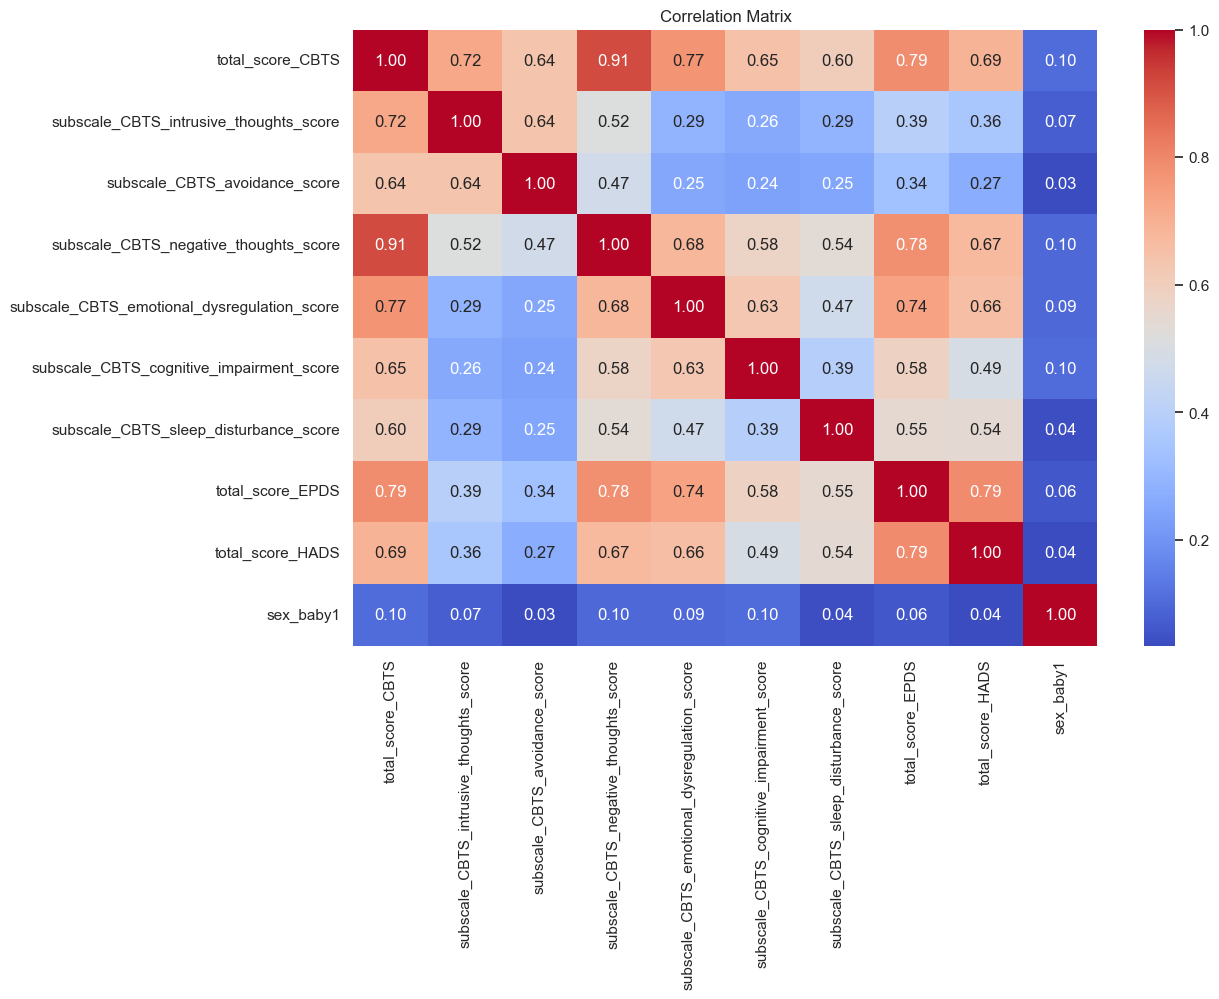

Correlation with Gestationnal_age:
total_score_CBTS                              -0.118551
subscale_CBTS_intrusive_thoughts_score        -0.160375
subscale_CBTS_avoidance_score                 -0.068302
subscale_CBTS_negative_thoughts_score         -0.069208
subscale_CBTS_emotional_dysregulation_score   -0.080279
subscale_CBTS_cognitive_impairment_score      -0.046126
subscale_CBTS_sleep_disturbance_score         -0.086329
total_score_EPDS                              -0.053882
total_score_HADS                              -0.101858
Gestationnal_age                               1.000000
Name: Gestationnal_age, dtype: float64

Correlation p-values with Gestationnal_age:
total_score_CBTS                               0.016455
subscale_CBTS_intrusive_thoughts_score         0.001136
subscale_CBTS_avoidance_score                  0.167985
subscale_CBTS_negative_thoughts_score          0.162402
subscale_CBTS_emotional_dysregulation_score    0.104978
subscale_CBTS_cognitive_impairment_score 

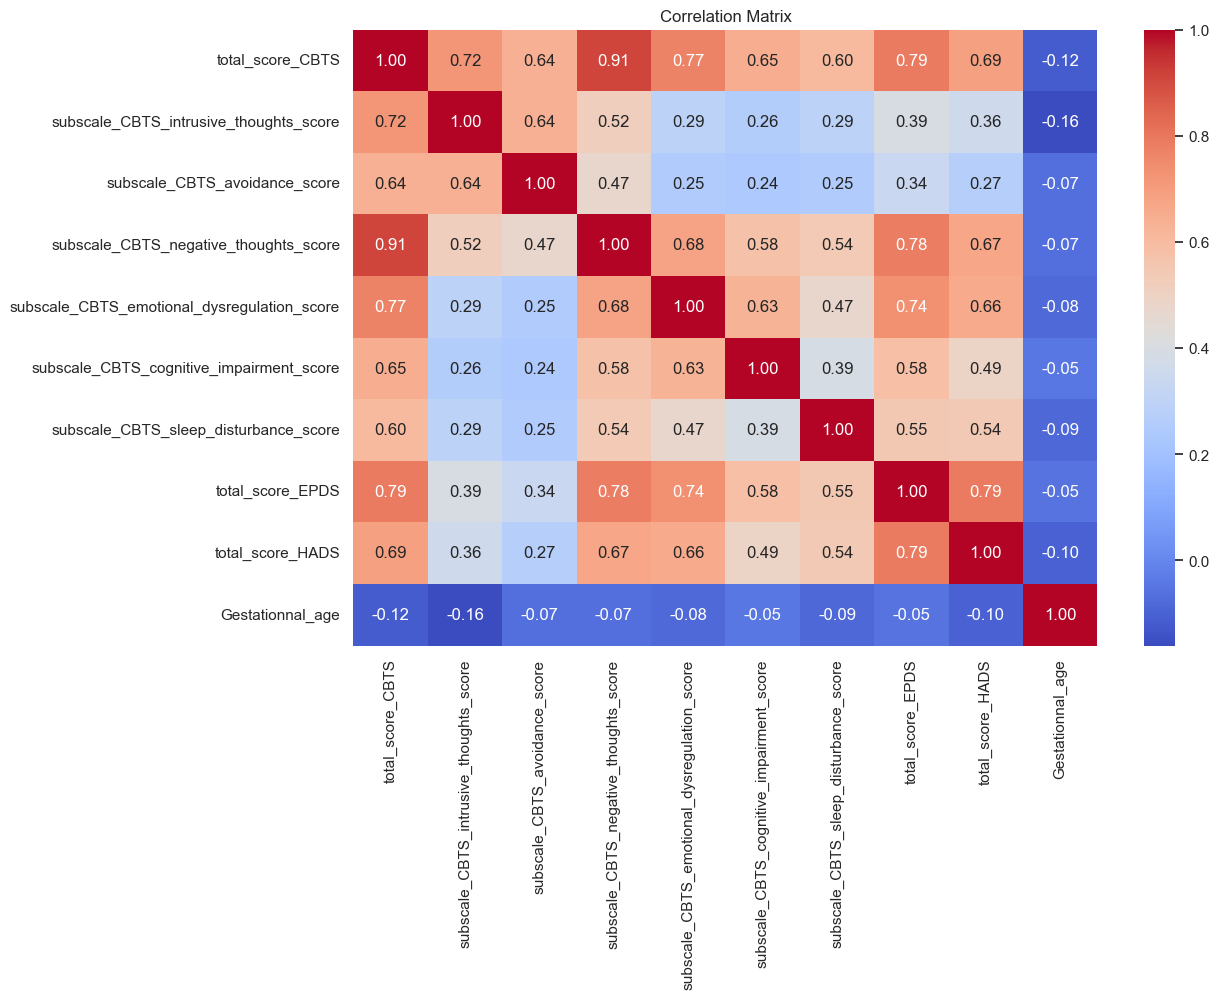

Correlation with Type_pregnancy:
total_score_CBTS                              -0.034519
subscale_CBTS_intrusive_thoughts_score         0.024309
subscale_CBTS_avoidance_score                 -0.013665
subscale_CBTS_negative_thoughts_score         -0.067193
subscale_CBTS_emotional_dysregulation_score   -0.024486
subscale_CBTS_cognitive_impairment_score       0.003731
subscale_CBTS_sleep_disturbance_score         -0.061728
total_score_EPDS                              -0.027414
total_score_HADS                              -0.064219
Type_pregnancy                                 1.000000
Name: Type_pregnancy, dtype: float64

Correlation p-values with Type_pregnancy:
total_score_CBTS                               0.486319
subscale_CBTS_intrusive_thoughts_score         0.624002
subscale_CBTS_avoidance_score                  0.782915
subscale_CBTS_negative_thoughts_score          0.175016
subscale_CBTS_emotional_dysregulation_score    0.621480
subscale_CBTS_cognitive_impairment_score       

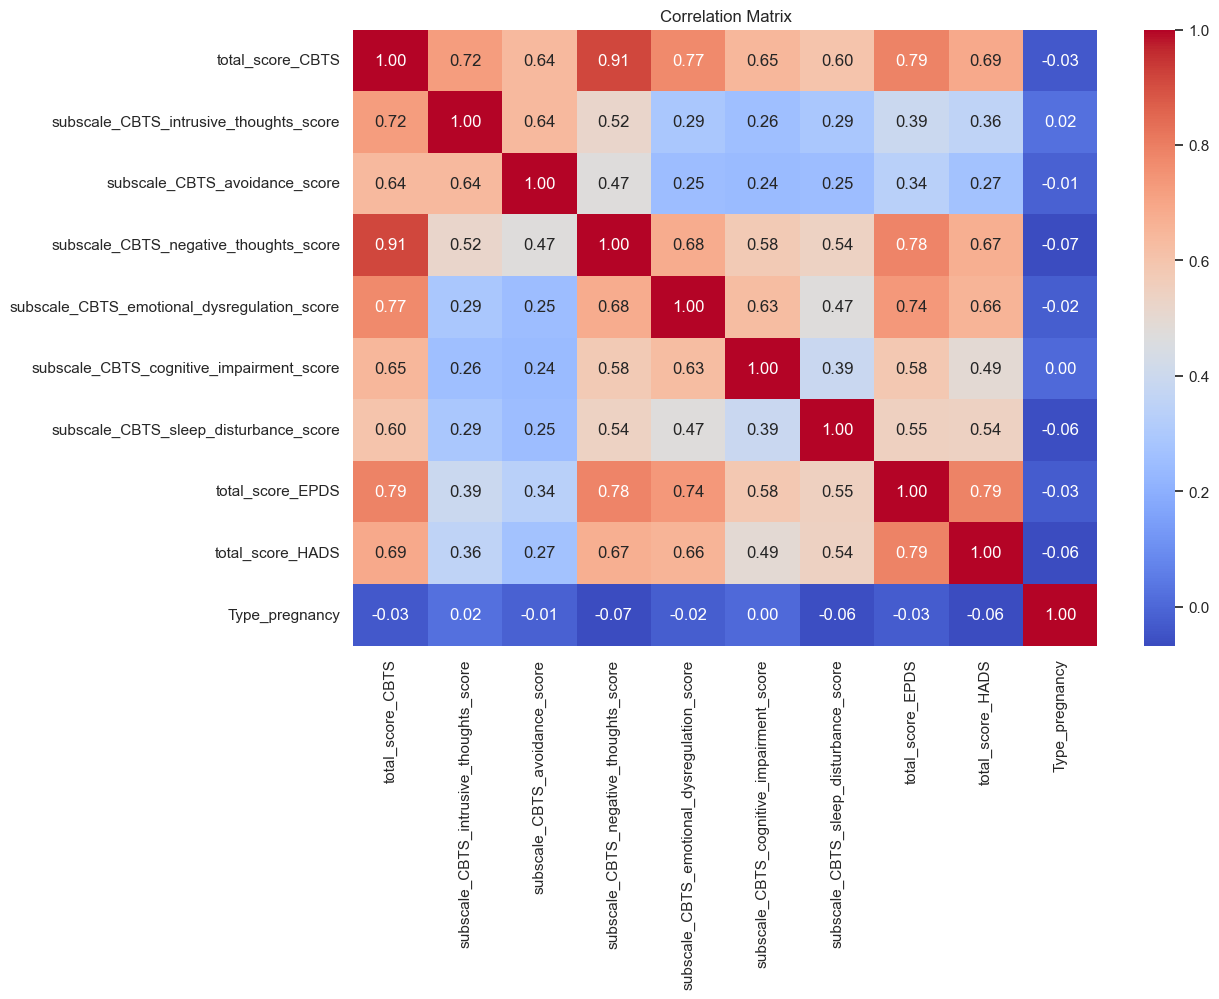

Correlation with Age:
total_score_CBTS                              -0.048361
subscale_CBTS_intrusive_thoughts_score        -0.039321
subscale_CBTS_avoidance_score                 -0.027276
subscale_CBTS_negative_thoughts_score         -0.039754
subscale_CBTS_emotional_dysregulation_score   -0.050633
subscale_CBTS_cognitive_impairment_score      -0.008019
subscale_CBTS_sleep_disturbance_score         -0.027427
total_score_EPDS                              -0.118503
total_score_HADS                              -0.086255
Age                                            1.000000
Name: Age, dtype: float64

Correlation p-values with Age:
total_score_CBTS                               0.329257
subscale_CBTS_intrusive_thoughts_score         0.427728
subscale_CBTS_avoidance_score                  0.582288
subscale_CBTS_negative_thoughts_score          0.422651
subscale_CBTS_emotional_dysregulation_score    0.307017
subscale_CBTS_cognitive_impairment_score       0.871565
subscale_CBTS_sleep_dist

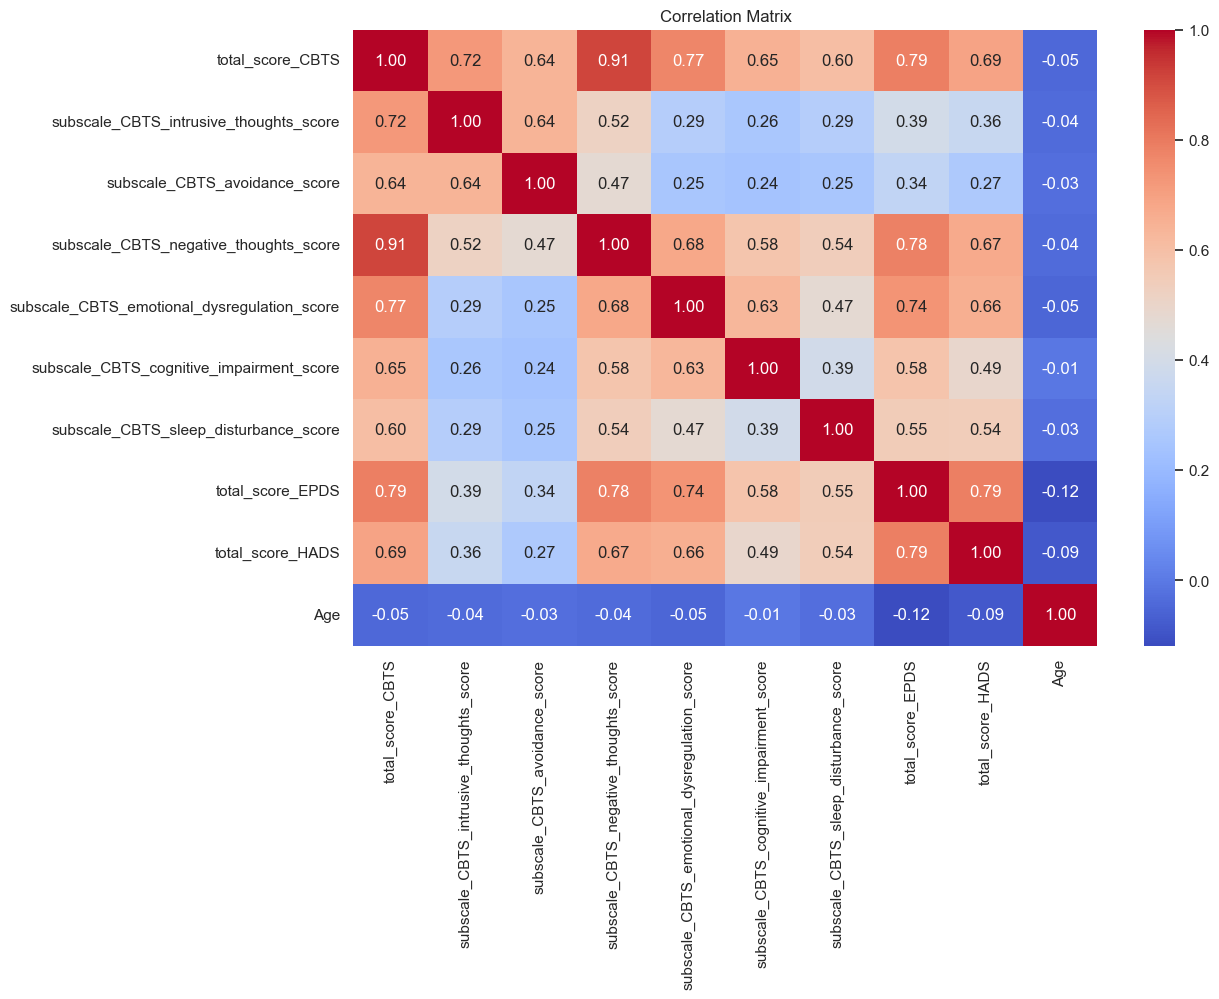

Correlation with Marital_status_edit:
total_score_CBTS                              -0.053090
subscale_CBTS_intrusive_thoughts_score        -0.058906
subscale_CBTS_avoidance_score                 -0.078675
subscale_CBTS_negative_thoughts_score         -0.034097
subscale_CBTS_emotional_dysregulation_score    0.007673
subscale_CBTS_cognitive_impairment_score      -0.058711
subscale_CBTS_sleep_disturbance_score         -0.067375
total_score_EPDS                              -0.040962
total_score_HADS                              -0.076455
Marital_status_edit                            1.000000
Name: Marital_status_edit, dtype: float64

Correlation p-values with Marital_status_edit:
total_score_CBTS                               0.284098
subscale_CBTS_intrusive_thoughts_score         0.234563
subscale_CBTS_avoidance_score                  0.112128
subscale_CBTS_negative_thoughts_score          0.491666
subscale_CBTS_emotional_dysregulation_score    0.877051
subscale_CBTS_cognitive_impairme

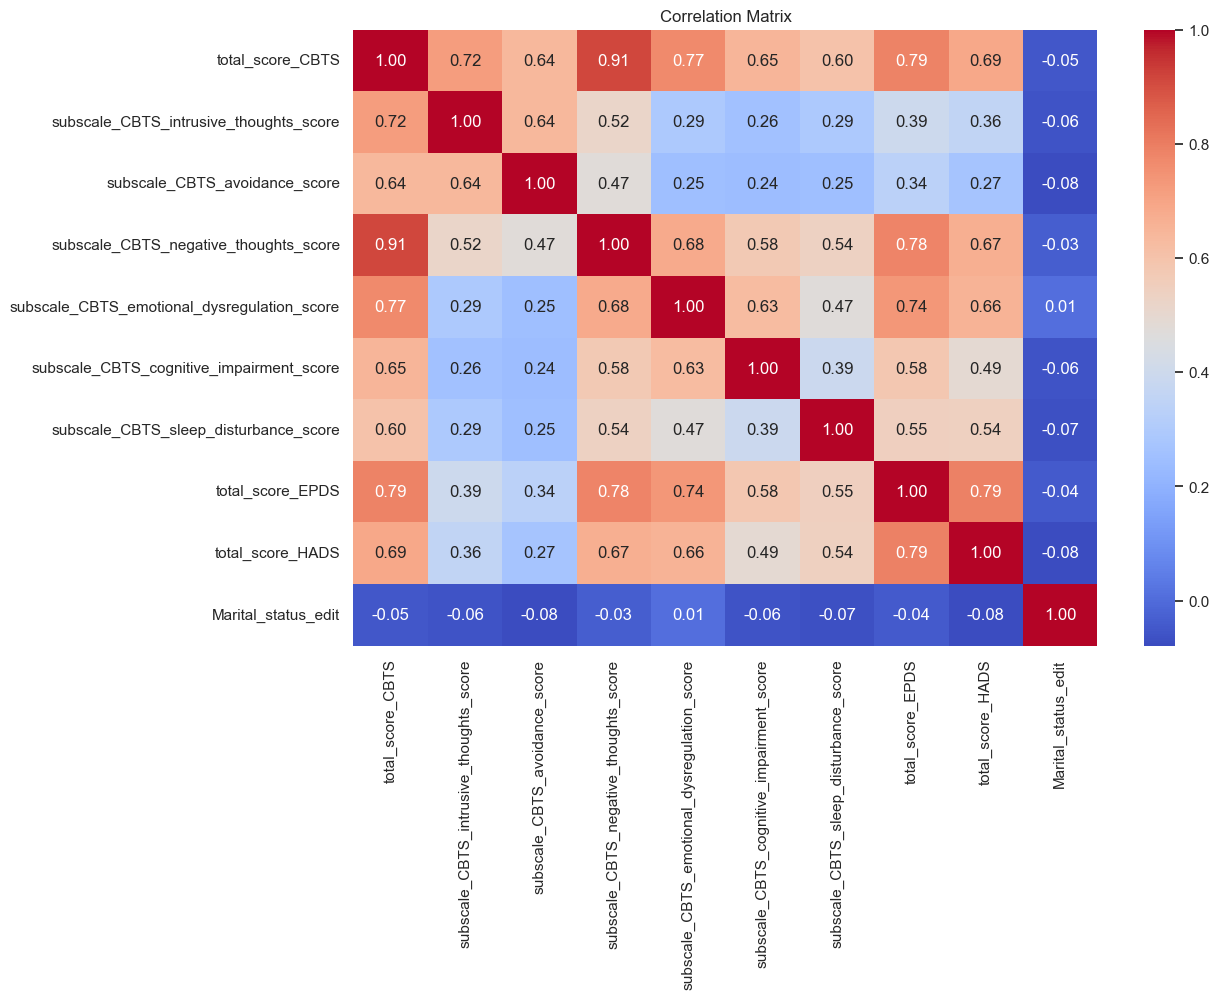

In [112]:
def analyze_variable(data, features, target):
    descriptive_stats = data.describe()
    
    correlation_results = data[features + [target]].corr()[target]
    print(f"Correlation with {target}:")
    print(correlation_results)
    
    correlation_pvalues = data[features + [target]].corr(method=lambda x, y: stats.pearsonr(x, y)[1])[target]
    print(f"\nCorrelation p-values with {target}:")
    print(correlation_pvalues)
    
    anova_results = {}
    for feature in features:
        anova_result = stats.f_oneway(*[group[target].values for name, group in data.groupby(feature)])
        anova_results[feature] = {'F-statistic': anova_result.statistic, 'p-value': anova_result.pvalue}
    
    print("\nANOVA Results:")
    for feature, result in anova_results.items():
        print(f"{feature} - F: {result['F-statistic']}, p: {result['p-value']}")
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(data[features + [target]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()


correlation_features = ['total_score_CBTS', 'subscale_CBTS_intrusive_thoughts_score', 
                        'subscale_CBTS_avoidance_score', 'subscale_CBTS_negative_thoughts_score', 
                        'subscale_CBTS_emotional_dysregulation_score', 'subscale_CBTS_cognitive_impairment_score', 
                        'subscale_CBTS_sleep_disturbance_score', 'total_score_EPDS', 'total_score_HADS']
categorical_features = ['total_score_EPDS', 'total_score_HADS', 'total_score_CBTS']

# Analyze variables for different target variables
analyze_variable(mental_health, correlation_features, 'sex_baby1')
analyze_variable(mental_health, correlation_features, 'Gestationnal_age')
analyze_variable(mental_health, correlation_features, 'Type_pregnancy')
analyze_variable(mental_health, correlation_features, 'Age')
analyze_variable(mental_health, correlation_features, 'Marital_status_edit')



Based on the analysis conducted:

- Sex of the Baby (sex_baby1):

There are subtle positive correlations between sex_baby1 and certain psychological scores, although most are not statistically significant.
Notably, emotional dysregulation and cognitive impairment scores show some significance regarding differences in means between groups.


- Gestational Age (Gestationnal_age):

Negative correlations exist between gestational age and some psychological scores, with statistical significance observed in total_score_CBTS and total_score_HADS.

ANOVA results indicate significant differences in means regarding these scores based on gestational age.

- Type of Pregnancy (Type_pregnancy):

Weak correlations are observed between type of pregnancy and psychological scores, with no significant differences found in means between groups through ANOVA.

- Mother's Age (Age):

There are slight negative correlations between mother's age and some psychological scores, with statistical significance found in total_score_CBTS.

ANOVA results show significant differences in means for total_score_CBTS and total_score_HADS based on mother's age.

- Marital Status (Marital_status_edit):

Weak negative correlations are present between marital status and some psychological scores, though most are not statistically significant.

Significant differences in means are observed for total_score_CBTS and total_score_HADS based on marital status.


- In conclusion, while there are subtle correlations between demographic factors and psychological scores, the significance varies. Gestational age and mother's age seem to have more pronounced effects on certain psychological scores, particularly total_score_CBTS and total_score_HADS. However, further research and contextual understanding are necessary to ascertain the precise implications of these relationships in the context of maternal mental health.




# How baby falling asleep and Maternal mental Health

In [113]:
# Function to calculate point-biserial correlation
def calculate_point_biserial(df, mental_health_scores, method_column):
    correlations = {}
    for score in mental_health_scores:
        correlations[score] = {}
        for method in df[method_column].unique():
            # Create a binary variable for the method
            df_binary = df[method_column].apply(lambda x: 1 if x == method else 0)
            # Calculate the point-biserial correlation
            correlation, p_value = stats.pointbiserialr(df_binary, df[score])
            correlations[score][method] = (correlation, p_value)
    return correlations

# List of mental health scores
mental_health_scores = ['total_score_CBTS', 'total_score_EPDS', 'total_score_HADS']

# Calculate correlations
correlations = calculate_point_biserial(mental_health, mental_health_scores, 'how_falling_asleep_bb1')

# Display the correlations
for score, methods in correlations.items():
    print(f"Correlations for {score}:")
    for method, (correlation, p_value) in methods.items():
        print(f"  Method {method}: Correlation = {correlation:.4f}, p-value = {p_value:.4f}")


Correlations for total_score_CBTS:
  Method 2.0: Correlation = 0.1183, p-value = 0.0167
  Method 4.0: Correlation = -0.0504, p-value = 0.3089
  Method 1.0: Correlation = -0.1134, p-value = 0.0218
  Method 5.0: Correlation = 0.0433, p-value = 0.3822
  Method 3.0: Correlation = 0.0559, p-value = 0.2590
Correlations for total_score_EPDS:
  Method 2.0: Correlation = 0.0859, p-value = 0.0828
  Method 4.0: Correlation = -0.0938, p-value = 0.0581
  Method 1.0: Correlation = -0.0312, p-value = 0.5288
  Method 5.0: Correlation = 0.0682, p-value = 0.1689
  Method 3.0: Correlation = 0.0202, p-value = 0.6833
Correlations for total_score_HADS:
  Method 2.0: Correlation = 0.0342, p-value = 0.4909
  Method 4.0: Correlation = -0.0386, p-value = 0.4368
  Method 1.0: Correlation = -0.0539, p-value = 0.2770
  Method 5.0: Correlation = 0.0882, p-value = 0.0748
  Method 3.0: Correlation = 0.0006, p-value = 0.9907


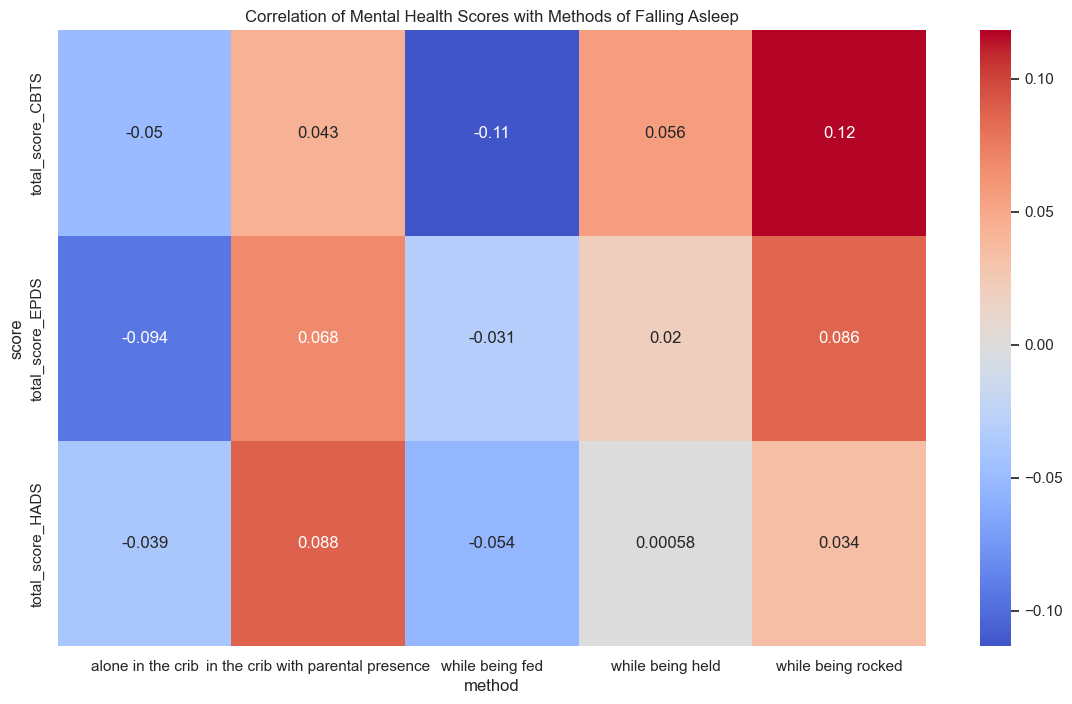

In [114]:
# Function to calculate point-biserial correlation
def calculate_point_biserial(df, mental_health_scores, method_column):
    correlations = {}
    for score in mental_health_scores:
        correlations[score] = {}
        for method in df[method_column].unique():
            # Create a binary variable for the method
            df_binary = df[method_column].apply(lambda x: 1 if x == method else 0)
            # Calculate the point-biserial correlation
            correlation, p_value = stats.pointbiserialr(df_binary, df[score])
            correlations[score][method] = (correlation, p_value)
    return correlations

# List of mental health scores
mental_health_scores = ['total_score_CBTS', 'total_score_EPDS', 'total_score_HADS']

# Calculate correlations
correlations = calculate_point_biserial(mental_health, mental_health_scores, 'how_falling_asleep_bb1')

# Convert the correlations dictionary to a DataFrame for visualization
correlation_data = []
for score, methods in correlations.items():
    for method, (correlation, p_value) in methods.items():
        correlation_data.append([score, method, correlation, p_value])

correlation_df = pd.DataFrame(correlation_data, columns=['score', 'method', 'correlation', 'p_value'])

# Map method codes to descriptions
method_mapping = {
    1: "while being fed",
    2: "while being rocked",
    3: "while being held",
    4: "alone in the crib",
    5: "in the crib with parental presence"
}
correlation_df['method'] = correlation_df['method'].map(method_mapping)

# Pivot the DataFrame for heatmap
correlation_pivot = correlation_df.pivot(index='score', columns='method', values='correlation')

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_pivot, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Mental Health Scores with Methods of Falling Asleep')
plt.show()

Total Score CBTS:

- While Being Fed (Method 1.0):

There is a statistically significant negative correlation (-0.1134) with CBTS total scores. This suggests that individuals who fall asleep while being fed tend to have lower scores on the CBTS scale, indicating potentially lower levels of trauma symptomatology.

- While Being Rocked (Method 2.0):

There is a statistically significant positive correlation (0.1183) with CBTS total scores. This implies that individuals who fall asleep while being rocked may exhibit higher levels of trauma symptomatology.

- While Being Held (Method 3.0):

The correlation with CBTS total scores is not statistically significant (p = 0.2590). This suggests that there is no strong association between falling asleep while being held and trauma symptomatology.

- Alone in the Crib (Method 4.0):

The correlation with CBTS total scores is not statistically significant (p = 0.3089). This implies that there is no significant relationship between falling asleep alone in the crib and trauma symptomatology.

- In the Crib with Parental Presence (Method 5.0):

The correlation with CBTS total scores is not statistically significant (p = 0.3822). This suggests that there is no strong association between falling asleep in the crib with parental presence and trauma symptomatology.

Total Score EPDS

- While Being Fed (Method 1.0):

The correlation with EPDS total scores is not statistically significant (p = 0.5288). This suggests that there is no significant relationship between falling asleep while being fed and postpartum depression symptoms.

- While Being Rocked (Method 2.0):

The correlation with EPDS total scores is not statistically significant (p = 0.0828). This implies that there is no strong association between falling asleep while being rocked and postpartum depression symptoms.

- While Being Held (Method 3.0):

The correlation with EPDS total scores is not statistically significant (p = 0.6833). This suggests that there is no significant relationship between falling asleep while being held and postpartum depression symptoms.
- Alone in the Crib (Method 4.0):

The correlation with EPDS total scores is not statistically significant (p = 0.0581). This suggests that there may be a weak association between falling asleep alone in the crib and postpartum depression symptoms, although it does not reach conventional levels of statistical significance.

- In the Crib with Parental Presence (Method 5.0):

The correlation with EPDS total scores is not statistically significant (p = 0.1689). This suggests that there is no significant relationship between falling asleep in the crib with parental presence and postpartum depression symptoms.

Total Score HADS

- While Being Fed (Method 1.0):

The correlation with HADS total scores is not statistically significant (p = 0.2770). This suggests that there is no significant relationship between falling asleep while being fed and general anxiety and depression symptoms.

- While Being Rocked (Method 2.0):

The correlation with HADS total scores is not statistically significant (p = 0.4909). This implies that there is no strong association between falling asleep while being rocked and general anxiety and depression symptoms.

- While Being Held (Method 3.0):

The correlation with HADS total scores is not statistically significant (p = 0.9907). This suggests that there is no significant relationship between falling asleep while being held and general anxiety and depression symptoms.

- Alone in the Crib (Method 4.0):

The correlation with HADS total scores is not statistically significant (p = 0.4368). This implies that there is no significant relationship between falling asleep alone in the crib and general anxiety and depression symptoms.

- In the Crib with Parental Presence (Method 5.0):

The correlation with HADS total scores is not statistically significant (p = 0.0748). This suggests that there may be a weak association between falling asleep in the crib with parental presence and general anxiety and depression symptoms, although it does not reach conventional levels of statistical significance.

# Conclusion

While there are some statistically significant correlations between certain methods of falling asleep and CBTS scores, the correlations with EPDS and HADS scores are generally not significant. This suggests that the method of falling asleep may have a more nuanced relationship with trauma symptomatology compared to postpartum depression and general anxiety symptoms. Further research with larger sample sizes and additional variables may provide a more comprehensive understanding of these relationships.

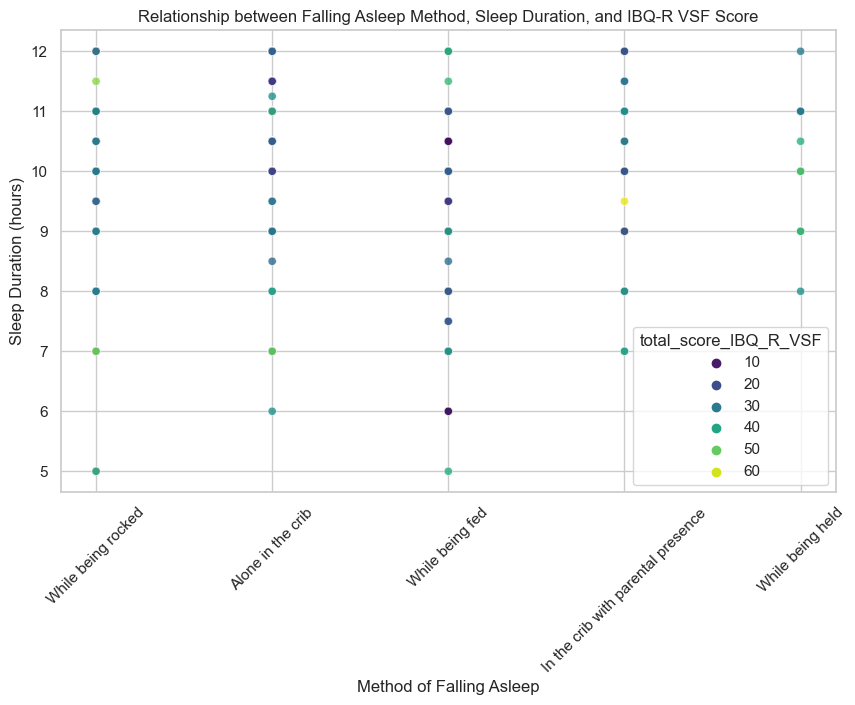

In [115]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Define the method of falling asleep labels
method_labels = {
    1: 'While being fed',
    2: 'While being rocked',
    3: 'While being held',
    4: 'Alone in the crib',
    5: 'In the crib with parental presence'
}

# Replace the numerical codes with their corresponding labels
mental_health['how_falling_asleep_label'] = mental_health['how_falling_asleep_bb1'].map(method_labels)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='how_falling_asleep_label', y='Sleep_night_duration_hours', hue='total_score_IBQ_R_VSF', data=mental_health, palette='viridis', alpha=0.8)

# Add labels and title
plt.title('Relationship between Falling Asleep Method, Sleep Duration, and IBQ-R VSF Score')
plt.xlabel('Method of Falling Asleep')
plt.ylabel('Sleep Duration (hours)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()




In [116]:
# Calculating the correlation between variables
correlation_matrix = mental_health[['total_score_IBQ_R_VSF', 'how_falling_asleep_bb1', 'Sleep_night_duration_hours']].corr()

# Displaying the correlation matrix
print(correlation_matrix)

# Performing multiple linear regression analysis
X = mental_health[['total_score_IBQ_R_VSF', 'how_falling_asleep_bb1']] # Independent variables
X = sm.add_constant(X) # Adding a constant for the intercept term
y = mental_health['Sleep_night_duration_hours'] # Dependent variable

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Displaying the regression results
print(model.summary())


                            total_score_IBQ_R_VSF  how_falling_asleep_bb1  \
total_score_IBQ_R_VSF                    1.000000               -0.057086   
how_falling_asleep_bb1                  -0.057086                1.000000   
Sleep_night_duration_hours              -0.071149                0.260990   

                            Sleep_night_duration_hours  
total_score_IBQ_R_VSF                        -0.071149  
how_falling_asleep_bb1                        0.260990  
Sleep_night_duration_hours                    1.000000  
                                OLS Regression Results                                
Dep. Variable:     Sleep_night_duration_hours   R-squared:                       0.071
Model:                                    OLS   Adj. R-squared:                  0.067
Method:                         Least Squares   F-statistic:                     15.58
Date:                        Wed, 05 Jun 2024   Prob (F-statistic):           3.02e-07
Time:                       


The correlation matrix indicates the correlation coefficients between the variables. It shows that "total_score_IBQ_R_VSF" has a weak negative correlation with "how_falling_asleep_bb1" and "Sleep_night_duration_hours". "how_falling_asleep_bb1" has a weak positive correlation with "Sleep_night_duration_hours".

The OLS regression results provide insights into how "total_score_IBQ_R_VSF" and "how_falling_asleep_bb1" impact "Sleep_night_duration_hours":

The R-squared value of 0.071 indicates that approximately 7.1% of the variability in "Sleep_night_duration_hours" is explained by the independent variables in the model.

Both the constant term and the coefficient for "how_falling_asleep_bb1" are statistically significant (p-values < 0.05), suggesting that "how_falling_asleep_bb1" has a significant impact on "Sleep_night_duration_hours".

The coefficient for "total_score_IBQ_R_VSF" is not statistically significant (p-value > 0.05), indicating that it does not have a significant impact on "Sleep_night_duration_hours".

The overall model is statistically significant (Prob (F-statistic) < 0.05), suggesting that the independent variables together have a significant effect on "Sleep_night_duration_hours".

Additionally, the Omnibus and Jarque-Bera tests provide information about the normality of residuals, with significant p-values indicating that the residuals are not normally distributed.

Overall, based on these results, it seems that "how_falling_asleep_bb1" is a significant predictor of "Sleep_night_duration_hours", while "total_score_IBQ_R_VSF" does not have a significant impact in this context.